In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [2]:
import os
path = os.getcwd()
base_dir = os.path.join(path, "데이터셋", "ch2025_data_items")


data_items_list = ["ch2025_mACStatus.parquet", "ch2025_mActivity.parquet", "ch2025_mAmbience.parquet",
                   "ch2025_mBle.parquet", "ch2025_mGps.parquet", "ch2025_mLight.parquet", "ch2025_mScreenStatus.parquet",
                   "ch2025_mUsageStats.parquet", "ch2025_mWifi.parquet", "ch2025_wHr.parquet", "ch2025_wLight.parquet", "ch2025_wPedo.parquet"]

paths = {name.split(" ")[0]: os.path.join(base_dir, name) for name in data_items_list}

print(paths)


train_path = os.path.join(path, "데이터셋", "ch2025_metrics_train.csv")
train_df = pd.read_csv(train_path)


Status_df = pd.read_parquet(paths["ch2025_mACStatus.parquet"])
Activity_df = pd.read_parquet(paths["ch2025_mActivity.parquet"])
Ambience_df = pd.read_parquet(paths["ch2025_mAmbience.parquet"])
Ble_df = pd.read_parquet(paths["ch2025_mBle.parquet"])
Gps_df = pd.read_parquet(paths["ch2025_mGps.parquet"])
Light_df = pd.read_parquet(paths["ch2025_mLight.parquet"])
ScreenStatus_df = pd.read_parquet(paths["ch2025_mScreenStatus.parquet"])
UsageStats_df = pd.read_parquet(paths["ch2025_mUsageStats.parquet"])
Wifi_df = pd.read_parquet(paths["ch2025_mWifi.parquet"])
wHr_df = pd.read_parquet(paths["ch2025_wHr.parquet"])
wLight_df = pd.read_parquet(paths["ch2025_wLight.parquet"])
wPedo_df = pd.read_parquet(paths["ch2025_wPedo.parquet"])

print(Status_df.head())
print(train_df.info())

{'ch2025_mACStatus.parquet': 'c:\\Users\\yunju\\OneDrive\\바탕 화면\\Repositroy\\dacon\\ETRI 휴먼이해 인공지능\\데이터셋\\ch2025_data_items\\ch2025_mACStatus.parquet', 'ch2025_mActivity.parquet': 'c:\\Users\\yunju\\OneDrive\\바탕 화면\\Repositroy\\dacon\\ETRI 휴먼이해 인공지능\\데이터셋\\ch2025_data_items\\ch2025_mActivity.parquet', 'ch2025_mAmbience.parquet': 'c:\\Users\\yunju\\OneDrive\\바탕 화면\\Repositroy\\dacon\\ETRI 휴먼이해 인공지능\\데이터셋\\ch2025_data_items\\ch2025_mAmbience.parquet', 'ch2025_mBle.parquet': 'c:\\Users\\yunju\\OneDrive\\바탕 화면\\Repositroy\\dacon\\ETRI 휴먼이해 인공지능\\데이터셋\\ch2025_data_items\\ch2025_mBle.parquet', 'ch2025_mGps.parquet': 'c:\\Users\\yunju\\OneDrive\\바탕 화면\\Repositroy\\dacon\\ETRI 휴먼이해 인공지능\\데이터셋\\ch2025_data_items\\ch2025_mGps.parquet', 'ch2025_mLight.parquet': 'c:\\Users\\yunju\\OneDrive\\바탕 화면\\Repositroy\\dacon\\ETRI 휴먼이해 인공지능\\데이터셋\\ch2025_data_items\\ch2025_mLight.parquet', 'ch2025_mScreenStatus.parquet': 'c:\\Users\\yunju\\OneDrive\\바탕 화면\\Repositroy\\dacon\\ETRI 휴먼이해 인공지능\\데이터셋\\ch2025_dat

In [3]:
all_data = [Status_df, Activity_df, Ambience_df, Ble_df, Gps_df, Light_df, ScreenStatus_df, UsageStats_df, Wifi_df, wHr_df, wLight_df, wPedo_df]
for data in all_data:
    print(data.head(3))

  subject_id           timestamp  m_charging
0       id01 2024-06-26 12:03:00           0
1       id01 2024-06-26 12:04:00           0
2       id01 2024-06-26 12:05:00           0
  subject_id           timestamp  m_activity
0       id01 2024-06-26 12:03:00           4
1       id01 2024-06-26 12:04:00           0
2       id01 2024-06-26 12:05:00           0
  subject_id           timestamp  \
0       id01 2024-06-26 13:00:10   
1       id01 2024-06-26 13:02:10   
2       id01 2024-06-26 13:04:10   

                                          m_ambience  
0  [[Music, 0.30902618], [Vehicle, 0.081680894], ...  
1  [[Music, 0.62307084], [Vehicle, 0.021118319], ...  
2  [[Horse, 0.25209898], [Animal, 0.24263993], [C...  
  subject_id           timestamp  \
0       id01 2024-06-26 12:13:00   
1       id01 2024-06-26 12:23:00   
2       id01 2024-06-26 12:33:00   

                                               m_ble  
0  [{'address': '00:15:7C:11:80:8D', 'device_clas...  
1  [{'address': '0A:

<Axes: xlabel='subject_id', ylabel='count'>

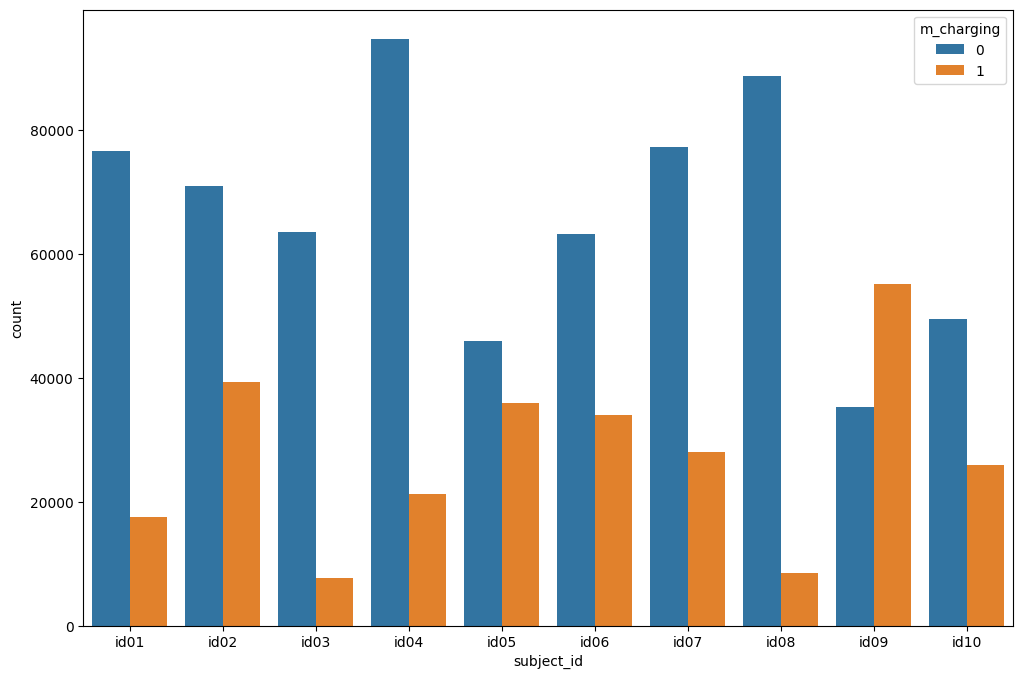

In [4]:
plt.figure(figsize = (12,8))
sns.countplot(x = "subject_id", hue = "m_charging", data = Status_df)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   subject_id    450 non-null    object
 1   sleep_date    450 non-null    object
 2   lifelog_date  450 non-null    object
 3   Q1            450 non-null    int64 
 4   Q2            450 non-null    int64 
 5   Q3            450 non-null    int64 
 6   S1            450 non-null    int64 
 7   S2            450 non-null    int64 
 8   S3            450 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 31.8+ KB


In [6]:
def split_array_column(df, col, count, num):
    df = df.copy()

    for i in range(count):
        df[f"{col}_{i}"] = df[col].apply(lambda x: x[i] if isinstance(x, (list, np.ndarray)) and len(x) > i else None)

    
    df = pd.DataFrame(df)
    for i in range(count):
        for n in range(num):
            odd_or_even = n % 2
            name = "data" if odd_or_even == 1  else "name"
            df[f"{col}_{i}_{name}"] = df[f"{col}_{i}"].apply(lambda x: (
                x[n] if isinstance(x, (list, np.ndarray)) and len(x) > n
                else list(x.values())[n] if isinstance(x, dict) and len(x) > n
                else None)
            )
            

    for i in range(count):
        df = df.drop([f"{col}_{i}"], axis = 1)
    
    df = df.drop(col , axis = 1)


    return df

ambience = split_array_column(Ambience_df, "m_ambience", 10, 2)
ble = split_array_column(Ble_df, "m_ble", 10, 2)
gps = split_array_column(Gps_df, "m_gps", 10, 2)
useagestats = split_array_column(UsageStats_df, "m_usage_stats", 10, 2)
wifi = split_array_column(Wifi_df, "m_wifi", 10, 2)
wHr_df["average_hr"] = wHr_df["heart_rate"].apply(np.mean)
wHr_df = wHr_df.drop("heart_rate", axis = 1)
ambience.head()
wifi.head(20)

,subject_id,timestamp,m_wifi_0_name,m_wifi_0_data,m_wifi_1_name,m_wifi_1_data,m_wifi_2_name,m_wifi_2_data,m_wifi_3_name,m_wifi_3_data,...,m_wifi_5_name,m_wifi_5_data,m_wifi_6_name,m_wifi_6_data,m_wifi_7_name,m_wifi_7_data,m_wifi_8_name,m_wifi_8_data,m_wifi_9_name,m_wifi_9_data
0,id01,2024-06-26 12:03:00,a0:0f:37:9a:5d:8b,-78,a0:0f:37:9a:5d:8c,-78.0,a0:0f:37:9a:5d:8d,-78.0,a0:0f:37:9a:5d:8e,-78.0,...,a0:0f:37:96:56:ef,-58.0,88:36:6c:86:75:84,-72.0,a0:0f:37:96:56:ee,-58.0,a0:0f:37:96:56:ed,-58.0,86:25:19:b5:b2:a5,-61.0
1,id01,2024-06-26 12:13:00,a0:0f:37:9a:5d:8b,-79,a0:0f:37:9a:5d:8c,-80.0,10:e3:c7:0a:74:d1,-78.0,a0:0f:37:9a:5d:8d,-80.0,...,a0:0f:37:9a:5d:8f,-79.0,a0:0f:37:96:56:ef,-57.0,88:36:6c:86:75:84,-71.0,a0:0f:37:96:56:ee,-56.0,a0:0f:37:96:56:ed,-57.0
2,id01,2024-06-26 12:23:00,10:e3:c7:0a:74:d1,-78,5a:86:94:10:a9:80,-79.0,a0:0f:37:96:56:ef,-61.0,a0:0f:37:96:56:ee,-61.0,...,a0:0f:37:96:56:ed,-61.0,a0:0f:37:96:56:ec,-61.0,a0:0f:37:96:56:eb,-61.0,86:25:19:c3:44:07,-83.0,a0:0f:37:9a:37:2f,-76.0
3,id01,2024-06-26 12:33:00,10:e3:c7:09:7f:bc,-80,22:e3:c7:07:62:7f,-84.0,74:ac:b9:ce:4d:41,-86.0,7a:ac:b9:ce:4d:41,-87.0,...,1e:bd:ad:12:50:22,-79.0,1e:bd:ad:12:50:23,-78.0,18:bd:ad:11:f2:10,-88.0,12:e3:c7:07:62:7f,-83.0,74:ac:b9:cd:4d:41,-78.0
4,id01,2024-06-26 12:43:00,56:46:ae:59:b1:13,-44,50:46:ae:59:b1:12,-52.0,50:46:ae:1d:65:33,-81.0,da:e3:5e:93:e2:98,-83.0,...,50:46:ae:59:b1:13,-45.0,0c:96:cd:39:8c:7f,-86.0,62:46:ae:1d:65:33,-78.0,28:ac:67:0c:77:b8,-81.0,None,NaN
5,id01,2024-06-26 12:53:00,5a:86:94:4e:08:38,-49,86:25:19:9f:9b:be,-42.0,86:25:19:cd:a6:fe,-79.0,1e:39:29:c7:88:78,-44.0,...,1e:39:29:bc:a5:3c,-87.0,None,NaN,None,NaN,None,NaN,None,NaN
6,id01,2024-06-26 13:03:00,08:5d:dd:85:4b:3f,-79,34:98:b5:13:14:fe,-76.0,54:ec:2f:1a:ad:c8,-79.0,88:3c:1c:aa:b8:6e,-81.0,...,1c:39:29:2f:de:56,-83.0,0c:96:cd:7e:37:c3,-76.0,1c:bf:ce:2d:a9:c3,-84.0,0c:96:cd:88:e9:83,-81.0,None,NaN
7,id01,2024-06-26 13:13:00,88:36:6c:99:d3:e8,-84,10:e3:c7:0b:31:83,-81.0,08:5d:dd:cb:b7:d9,-77.0,88:3c:1c:aa:b8:6e,-80.0,...,18:c5:01:94:37:7e,-78.0,00:0f:00:49:2c:16,-77.0,3c:7c:3f:0b:b3:30,-81.0,5a:86:94:cd:3d:f8,-80.0,1c:ec:72:51:20:2d,-78.0
8,id01,2024-06-26 13:23:00,08:5d:dd:cb:b7:d9,-77,12:09:a5:05:93:9e,-81.0,18:4b:0d:27:e8:c8,-81.0,12:23:aa:c7:8d:6a,-79.0,...,3c:7c:3f:0b:b3:30,-80.0,5a:86:94:cd:3d:f8,-74.0,00:07:89:70:31:39,-83.0,34:98:b5:13:14:fe,-75.0,1e:39:29:62:a4:02,-81.0
9,id01,2024-06-26 13:33:00,00:07:89:b6:0e:d8,-80,10:e3:c7:0b:31:83,-78.0,b4:a9:4f:4c:03:29,-78.0,88:3c:1c:aa:b8:6e,-79.0,...,00:0f:00:49:2c:16,-77.0,5a:86:94:cd:3d:f8,-80.0,12:e8:a7:4d:69:91,-79.0,1c:ec:72:51:20:2d,-76.0,34:98:b5:13:14:fe,-76.0


In [7]:
sound_categories = {
    '기계/교통': [
        'Train', 'Bicycle', 'Motor vehicle (road)', 'Bus', 'Car', 'Motorcycle', 'Boat', 'Water vehicle', 'Ship',
        'Subway, metro, underground', 'Engine', 'Jet engine', 'Helicopter', 'Fixed-wing aircraft, airplane',
        'Aircraft', 'Engine starting', 'Power tool', 'Chainsaw', 'Drill', 'Jackhammer', 'Power windows',
        'Electric shaver', 'Sewing machine', 'Microwave oven', 'Vacuum cleaner', 'Cash register', 'Elevator',
        'Fire engine, fire truck (siren)', 'Ambulance (siren)', 'Police car (siren)', 'Emergency vehicle',
        'Vehicle horn, car horn, honking', 'Reversing beeps', 'Car alarm', 'Foghorn', 'Air horn, truck horn', "Vehicle"
    ],
    '자연/동물': [
        'Dog', 'Cat', 'Horse', 'Bird', 'Frog', 'Pig', 'Goat', 'Sheep', 'Cow', 'Cattle, bovinae',
        'Roaring cats (lions, tigers)', 'Duck', 'Turkey', 'Goose', 'Owl', 'Pigeon, dove', 'Bee, wasp, etc.',
        'Snake', 'Fly, housefly', 'Insect', 'Rodents, rats, mice', 'Wild animals',
        'Livestock, farm animals, working animals', 'Domestic animals, pets', 'Animal',
        'Rustling leaves', 'Rain', 'Waterfall', 'Ocean', 'Thunderstorm', 'Wind', 'Waves, surf',
        'Fire', 'Crackle', 'Gurgling', 'Raindrop'
    ],
    '음악/악기': [
        'Music', 'Singing', 'Choir', 'Vocal music', 'Opera', 'Rapping', 'Chant', 'Yodeling', 'Lullaby', 'Music for children',
        'Flute', 'Drum', 'Drum machine', 'Percussion', 'Glockenspiel', 'Keyboard (musical)', 'Tambourine', 'Cowbell',
        'Wind chime', 'Bell', 'Tuning fork', 'Chime', 'Mandolin', 'Singing bowl', 'Sitar', 'Acoustic guitar',
        'Electric guitar', 'Piano', 'Cello', 'Bass guitar', 'Synthesizer', 'Electronic tuner', 'Effects unit',
        'Rattle (instrument)', 'Mallet percussion'
    ],
    '음성/대화': [
        'Speech', 'Child speech, kid speaking', 'Child singing', 'Babbling', 'Baby cry, infant cry', 'Baby laughter',
        'Screaming', 'Yell', 'Shout', 'Whimper', 'Crying, sobbing', 'Moan', 'Wail, moan', 'Whispering',
        'Talking', 'Dialogue', 'Hubbub, speech noise, speech babble', 'Groan', 'Grunt', 'Gasp', 'Sigh', 'Hiccup',
        'Snoring', 'Pant', 'Breathing', 'Laughter', 'Beatboxing', 'Cheering', 'Chatter', 'Narration, monologue',
        'Synthetic singing', 'Mantra', 'Whoop'
    ],
    '효과음/충격음': [
        'Explosion', 'Firecracker', 'Gunshot, gunfire', 'Bang', 'Burst, pop', 'Smash, crash', 'Crash', 'Breaking',
        'Crack', 'Shatter', 'Slap, smack', 'Thump, thud', 'Whack, thwack', 'Skidding', 'Screeching', 'Squeal',
        'Rattle', 'Rumble', 'Crunch', 'Clap', 'Clapping', 'Knock', 'Slam', 'Beep, bleep', 'Ding', 'Ding-dong',
        'Toot', 'Tick', 'Ping', 'Click', 'Creak', 'Squeak', 'Splinter', 'Cap gun', 'Honk', 'Zipper (clothing)',
        'Clip-clop', 'Walk, footsteps', 'Shuffle'
    ],
    '가전/생활소리': [
        'Dishes, pots, and pans', 'Cutlery, silverware', 'Glass', 'Drawer open or close', 'Cupboard open or close',
        'Toilet flush', 'Sink (filling or washing)', 'Bathtub (filling or washing)', 'Water tap, faucet',
        'Microwave oven', 'Blender', 'Coffee machine', 'Typing', 'Computer keyboard', 'Typewriter', 'Printer',
        'Power windows, electric windows', 'Hair dryer', 'Electric toothbrush', 'Toothbrush', 'Vacuum cleaner',
        'Sewing machine'
    ],
    '환경음/배경음': [
        'Silence', 'Noise', 'White noise', 'Pink noise', 'Environmental noise', 'Wind noise (microphone)', 'Cacophony',
        'Crowd', 'Outside, urban or manmade', 'Inside, small room', 'Inside, large room or hall', 'Outside, rural or natural',
        'Sound effect', 'Sidetone', 'Static', 'Mains hum'
    ],
    '조작/기계작동': [
        'Keys jangling', 'Door', 'Sliding door', 'Doorbell', 'Lock/unlock', 'Switch', 'Ratchet, pawl', 'Gears', 'Fan',
        'Mechanical fan', 'Sawing', 'Filing (rasp)', 'Tools', 'Chop', 'Chopping (food)', 'Shuffling cards',
        'Writing', 'Rub', 'Scratch', 'Scratching (performance technique)', 'Crumpling, crinkling', 'Stir',
        'Pour', 'Fill (with liquid)', 'Spray', 'Whip', 'Drip', 'Trickle, dribble', 'Biting', 'Chewing, mastication'
    ],
    '알람/신호': [
        'Fire alarm', 'Smoke detector, smoke alarm', 'Beep, bleep', 'Alarm', 'Alarm clock', 'Ringtone',
        'Telephone bell ringing', 'Busy signal', 'Telephone', 'Telephone dialing, DTMF', 'Siren',
        'Steam whistle', 'Air horn, truck horn', 'Car alarm', 'Ice cream truck, ice cream van',
        'Bell', 'Jingle bell', 'Jingle, tinkle', 'Chirp tone'
    ],
    '기타': [
        'Whale vocalization', 'Sonar', 'Camera', 'Single-lens reflex camera', 'Computer sounds',
        'Synth tones', 'Light engine (high frequency)', 'Heavy engine (low frequency)', 'Whoosh, swoosh, swish',
        'Vibration', 'Pulse', 'Throbbing', 'Plop', 'Bellow', 'Flap', 'Boing'
    ]
}


def map_to_category(sound):
    for category, sounds in sound_categories.items():
        if sound in sounds:
            return category
    return '기타'

for i in range(10):
    column_name = f"categorical_{i}"
    ambience[f"categorical_{i}"] = ambience[f"m_ambience_{i}_name"].apply(map_to_category)

ambience.head(10)

,subject_id,timestamp,m_ambience_0_name,m_ambience_0_data,m_ambience_1_name,m_ambience_1_data,m_ambience_2_name,m_ambience_2_data,m_ambience_3_name,m_ambience_3_data,...,categorical_0,categorical_1,categorical_2,categorical_3,categorical_4,categorical_5,categorical_6,categorical_7,categorical_8,categorical_9
0,id01,2024-06-26 13:00:10,Music,0.30902618,Vehicle,0.081680894,Motor vehicle (road),0.04035286,"Outside, urban or manmade",0.037144363,...,음악/악기,기계/교통,기계/교통,환경음/배경음,환경음/배경음,기계/교통,음성/대화,환경음/배경음,기타,환경음/배경음
1,id01,2024-06-26 13:02:10,Music,0.62307084,Vehicle,0.021118319,Bell,0.018510727,Hiss,0.013137147,...,음악/악기,기계/교통,음악/악기,기타,알람/신호,음악/악기,기계/교통,기계/교통,기계/교통,기타
2,id01,2024-06-26 13:04:10,Horse,0.25209898,Animal,0.24263993,Clip-clop,0.24169719,"Outside, rural or natural",0.20218423,...,자연/동물,자연/동물,효과음/충격음,환경음/배경음,자연/동물,자연/동물,자연/동물,자연/동물,자연/동물,기계/교통
3,id01,2024-06-26 13:06:10,Speech,0.93433166,"Inside, large room or hall",0.041821606,"Narration, monologue",0.015862875,"Inside, public space",0.0069918185,...,음성/대화,환경음/배경음,음성/대화,기타,기타,음악/악기,조작/기계작동,환경음/배경음,효과음/충격음,기타
4,id01,2024-06-26 13:08:10,Speech,0.8935082,"Inside, small room",0.019385122,"Inside, large room or hall",0.01352074,Conversation,0.0076918676,...,음성/대화,환경음/배경음,환경음/배경음,기타,환경음/배경음,환경음/배경음,음성/대화,기타,자연/동물,음성/대화
5,id01,2024-06-26 13:10:10,Speech,0.79542226,"Inside, large room or hall",0.049179025,"Inside, public space",0.005481243,"Narration, monologue",0.004768856,...,음성/대화,환경음/배경음,기타,음성/대화,환경음/배경음,기타,조작/기계작동,가전/생활소리,조작/기계작동,효과음/충격음
6,id01,2024-06-26 13:12:10,Speech,0.8184474,Buzz,0.027313255,"Inside, public space",0.017776482,"Inside, large room or hall",0.016867302,...,음성/대화,기타,기타,환경음/배경음,기타,자연/동물,자연/동물,가전/생활소리,조작/기계작동,환경음/배경음
7,id01,2024-06-26 13:14:10,Speech,0.80110717,"Inside, large room or hall",0.015226506,"Inside, small room",0.013447352,"Domestic animals, pets",0.009014404,...,음성/대화,환경음/배경음,환경음/배경음,자연/동물,자연/동물,기타,자연/동물,음성/대화,기타,기타
8,id01,2024-06-26 13:16:10,Speech,0.50018805,"Domestic animals, pets",0.05621013,Breathing,0.04530055,"Inside, small room",0.035082698,...,음성/대화,자연/동물,음성/대화,환경음/배경음,자연/동물,자연/동물,음성/대화,자연/동물,환경음/배경음,기타
9,id01,2024-06-26 13:18:10,Speech,0.9326062,"Inside, large room or hall",0.03695555,"Inside, public space",0.015402272,"Narration, monologue",0.0073751584,...,음성/대화,환경음/배경음,기타,음성/대화,환경음/배경음,기타,환경음/배경음,기계/교통,기계/교통,기계/교통


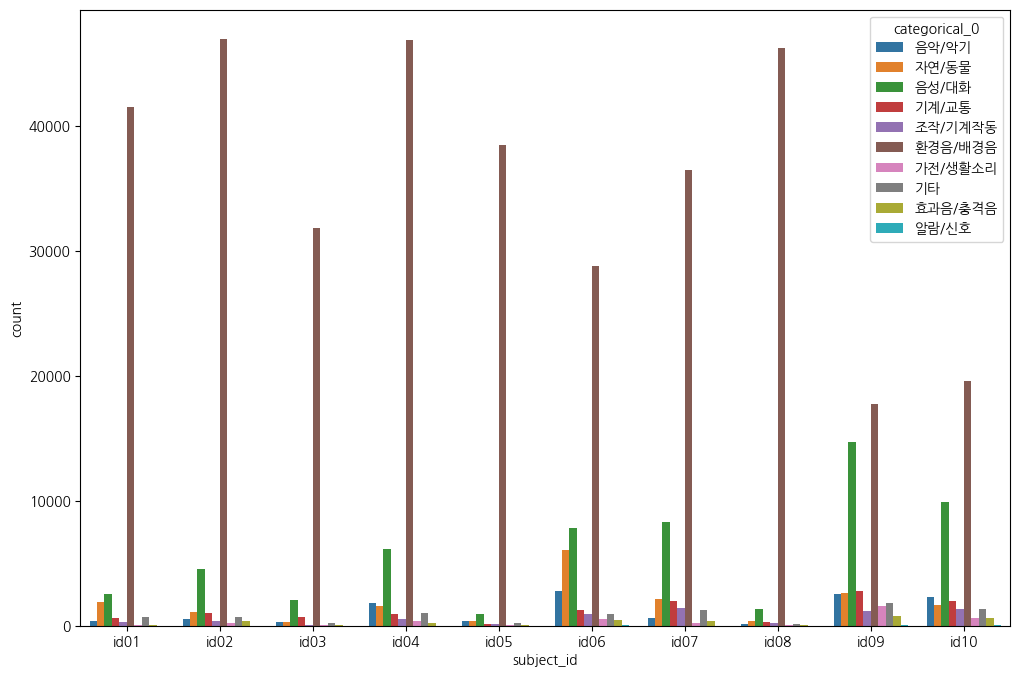

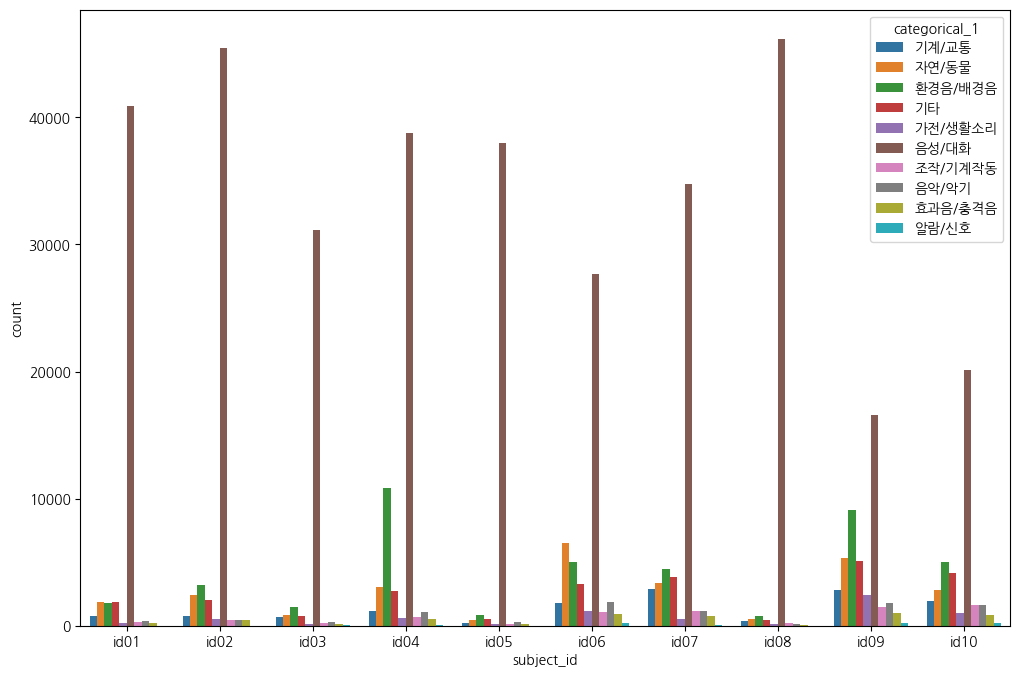

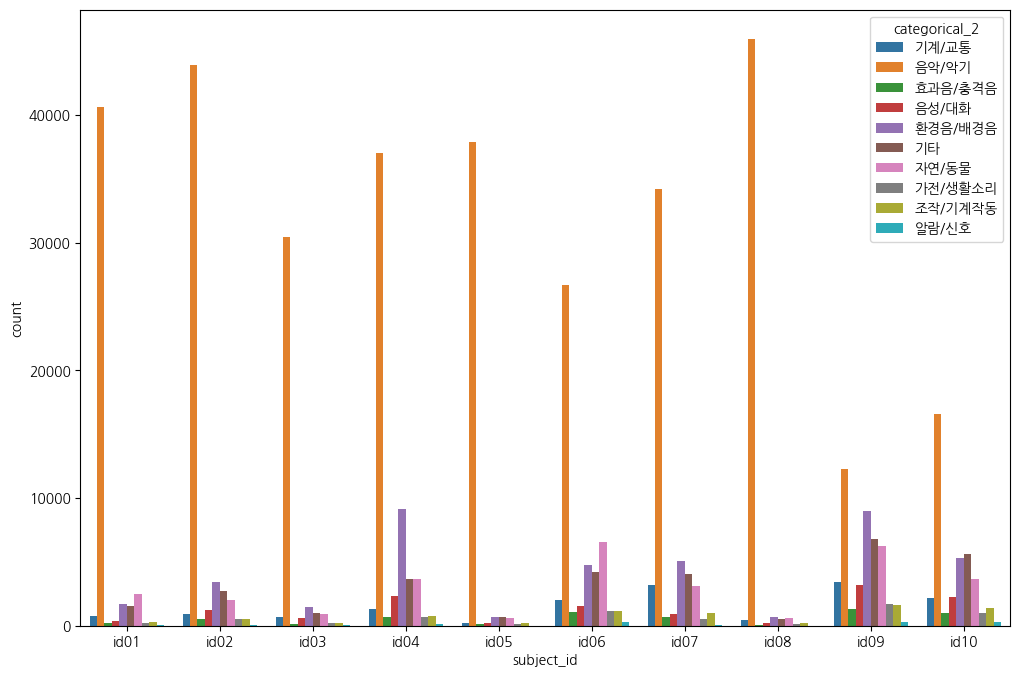

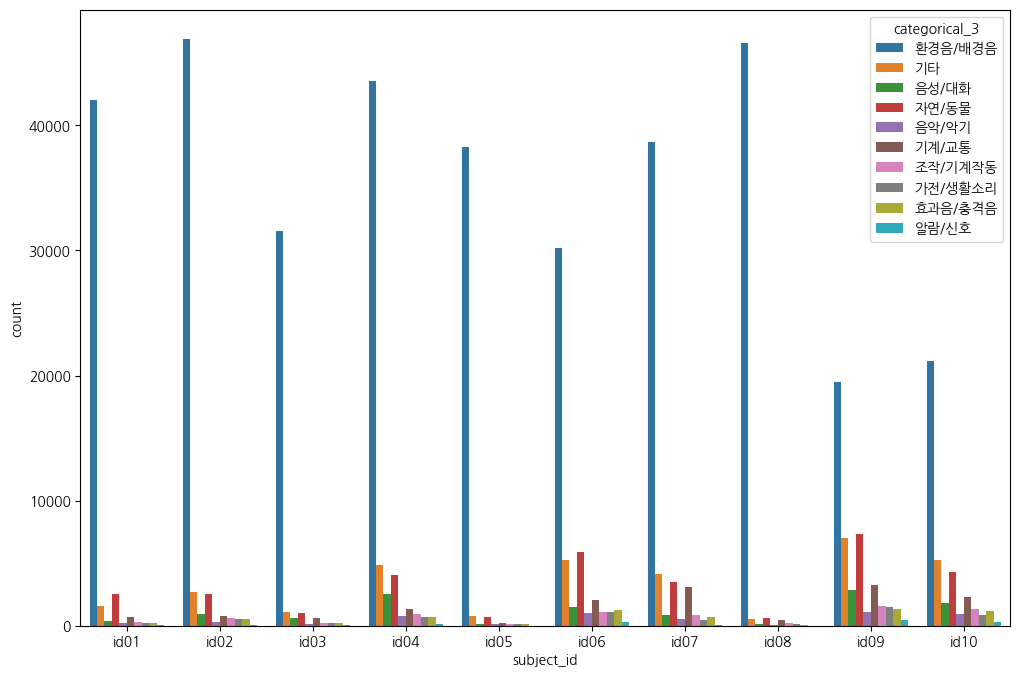

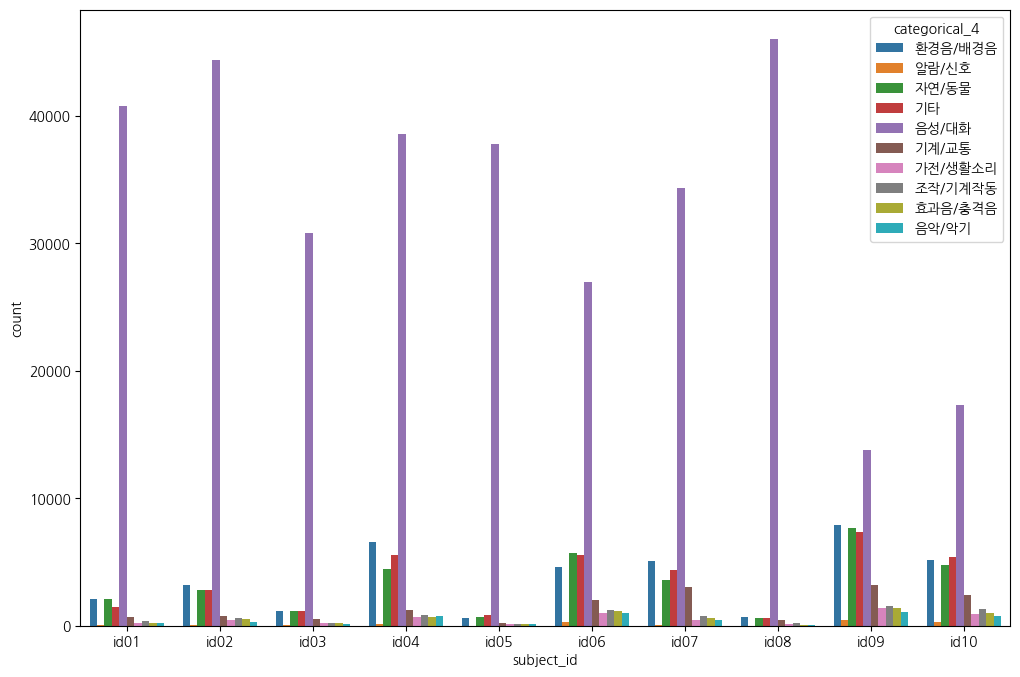

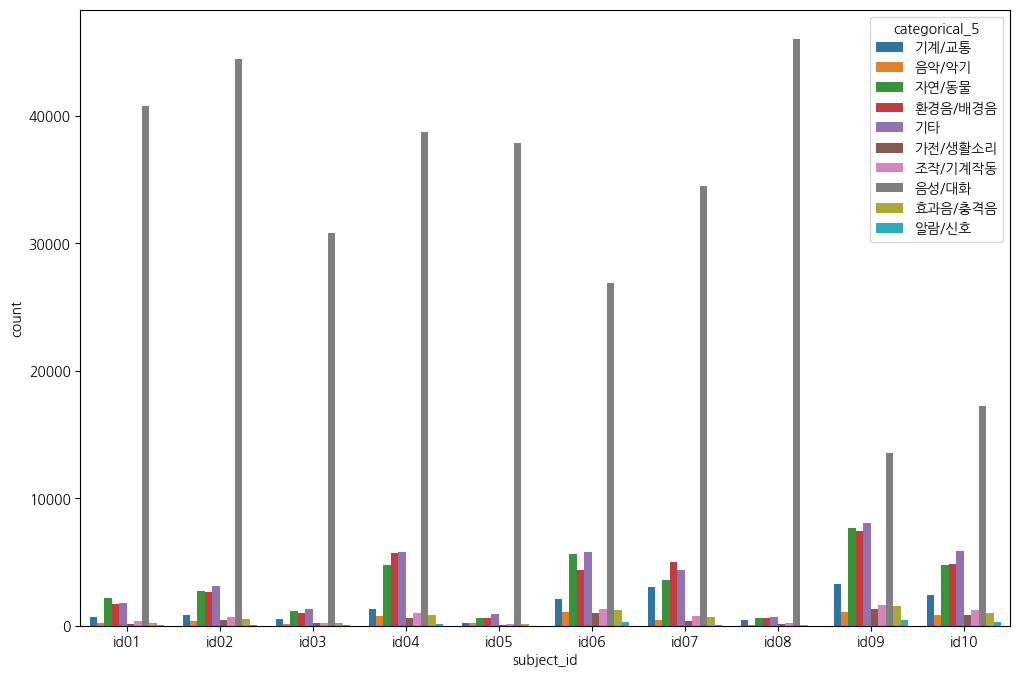

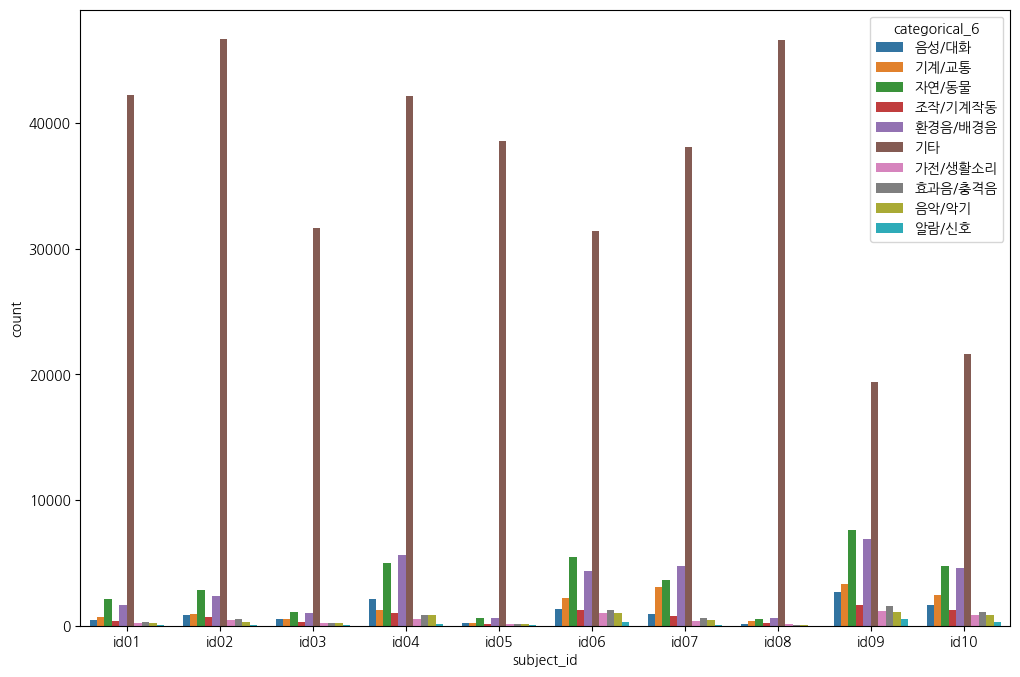

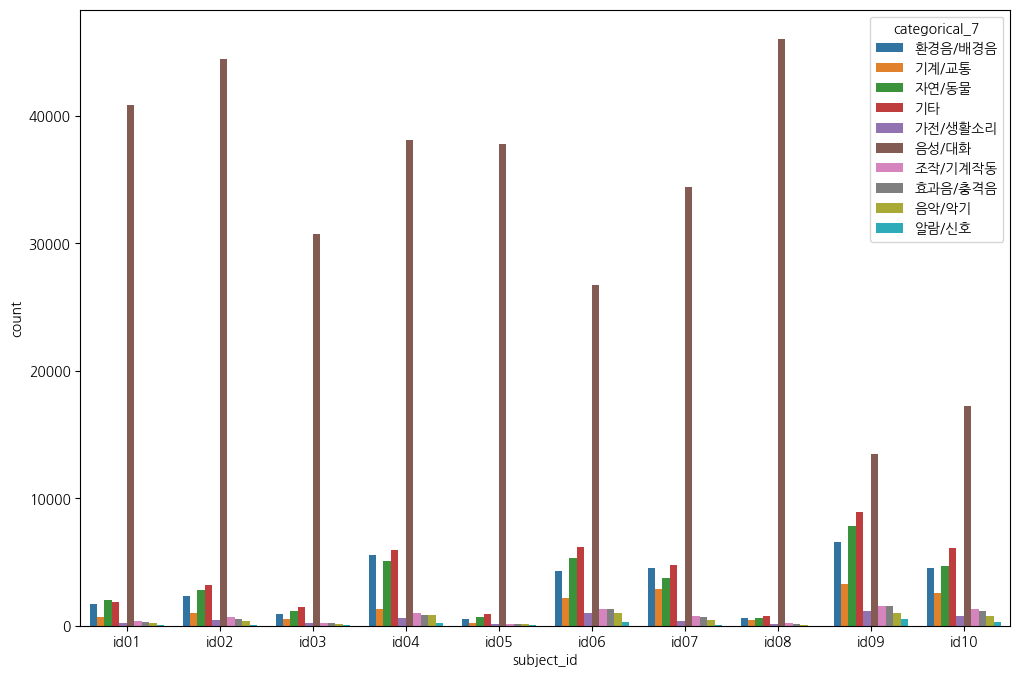

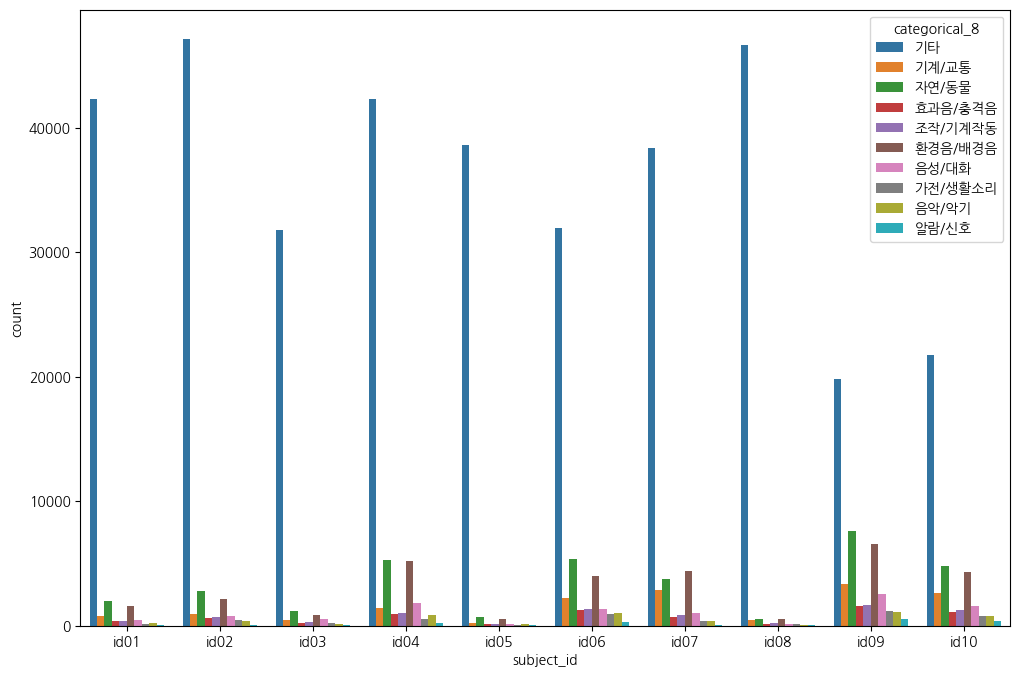

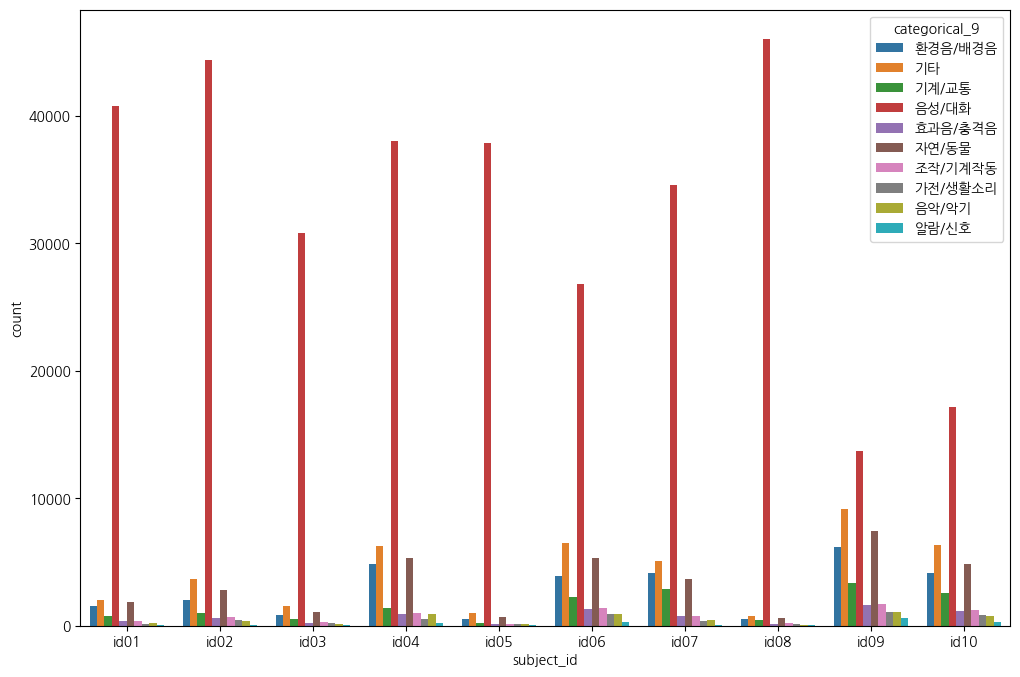

In [8]:
plt.rc("font", family = "NanumGothic")
for i in range(10):
    plt.figure(figsize = (12,8))
    sns.countplot(x = "subject_id", hue = f"categorical_{i}", data = ambience)
    plt.show()

In [9]:
Gps_df.head()

,subject_id,timestamp,m_gps
0,id01,2024-06-26 12:03:00,"[{'altitude': 110.6, 'latitude': 0.2077385, 'l..."
1,id01,2024-06-26 12:04:00,"[{'altitude': 110.8, 'latitude': 0.2078068, 'l..."
2,id01,2024-06-26 12:05:00,"[{'altitude': 110.7, 'latitude': 0.2078214, 'l..."
3,id01,2024-06-26 12:06:00,"[{'altitude': 110.7, 'latitude': 0.2078395, 'l..."
4,id01,2024-06-26 12:07:00,"[{'altitude': 110.8, 'latitude': 0.2078478, 'l..."


In [10]:
Status_df.head()
wHr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382918 entries, 0 to 382917
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   subject_id  382918 non-null  object        
 1   timestamp   382918 non-null  datetime64[ns]
 2   average_hr  382918 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 8.8+ MB


In [11]:
resample_data = [Status_df, Activity_df, wHr_df, Light_df, wLight_df, wPedo_df]

for i, data in enumerate(resample_data):

    data.info()
    
    data["timestamp"] = pd.to_datetime(data["timestamp"])
    data.set_index("timestamp", inplace = True)

    data = data.groupby("subject_id").resample("1D", level = "timestamp").mean()
    resample_data[i] = data
    
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939896 entries, 0 to 939895
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   subject_id  939896 non-null  object        
 1   timestamp   939896 non-null  datetime64[ns]
 2   m_charging  939896 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 21.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961062 entries, 0 to 961061
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   subject_id  961062 non-null  object        
 1   timestamp   961062 non-null  datetime64[ns]
 2   m_activity  961062 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 22.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382918 entries, 0 to 382917
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 

In [12]:
merged_data = pd.concat(resample_data, axis = 1)
merged_data.head()
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 853 entries, ('id01', Timestamp('2024-06-26 00:00:00')) to ('id10', Timestamp('2024-09-26 00:00:00'))
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   m_charging       700 non-null    float64
 1   m_activity       700 non-null    float64
 2   average_hr       636 non-null    float64
 3   m_light          700 non-null    float64
 4   w_light          664 non-null    float64
 5   step             653 non-null    float64
 6   step_frequency   653 non-null    float64
 7   running_step     653 non-null    float64
 8   walking_step     653 non-null    float64
 9   distance         653 non-null    float64
 10  speed            653 non-null    float64
 11  burned_calories  653 non-null    float64
dtypes: float64(12)
memory usage: 88.4+ KB


In [13]:
merged_df = merged_data.apply(lambda group: group.fillna(method='ffill'))
merged_df.info()
print(merged_df.index.names)
merged_df_index = merged_df.reset_index()
print(merged_df_index.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 853 entries, ('id01', Timestamp('2024-06-26 00:00:00')) to ('id10', Timestamp('2024-09-26 00:00:00'))
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   m_charging       853 non-null    float64
 1   m_activity       853 non-null    float64
 2   average_hr       853 non-null    float64
 3   m_light          853 non-null    float64
 4   w_light          853 non-null    float64
 5   step             853 non-null    float64
 6   step_frequency   853 non-null    float64
 7   running_step     853 non-null    float64
 8   walking_step     853 non-null    float64
 9   distance         853 non-null    float64
 10  speed            853 non-null    float64
 11  burned_calories  853 non-null    float64
dtypes: float64(12)
memory usage: 88.4+ KB
['subject_id', 'timestamp']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 14 colum

C:\Users\yunju\AppData\Local\Temp\ipykernel_33452\1860903376.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df = merged_data.apply(lambda group: group.fillna(method='ffill'))


array([[<Axes: title={'center': 'm_charging'}>,
        <Axes: title={'center': 'm_activity'}>,
        <Axes: title={'center': 'average_hr'}>],
       [<Axes: title={'center': 'm_light'}>,
        <Axes: title={'center': 'w_light'}>,
        <Axes: title={'center': 'step'}>],
       [<Axes: title={'center': 'step_frequency'}>,
        <Axes: title={'center': 'running_step'}>,
        <Axes: title={'center': 'walking_step'}>],
       [<Axes: title={'center': 'distance'}>,
        <Axes: title={'center': 'speed'}>,
        <Axes: title={'center': 'burned_calories'}>]], dtype=object)

C:\Users\yunju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
C:\Users\yunju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


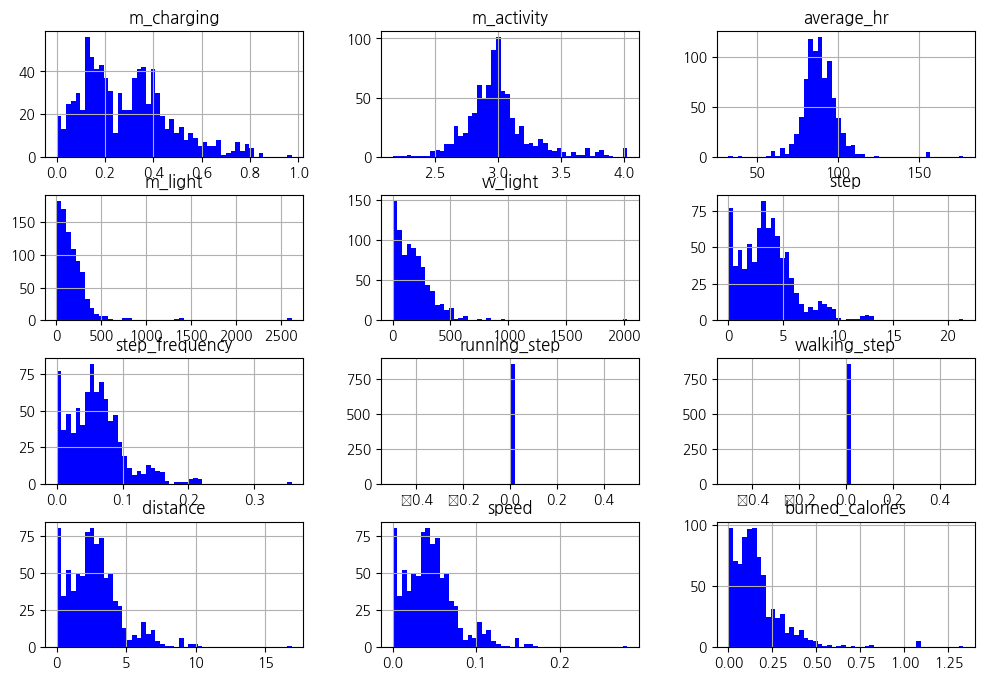

In [14]:
merged_df.hist(figsize = (12,8), color = "b", bins = 50)

C:\Users\yunju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
C:\Users\yunju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


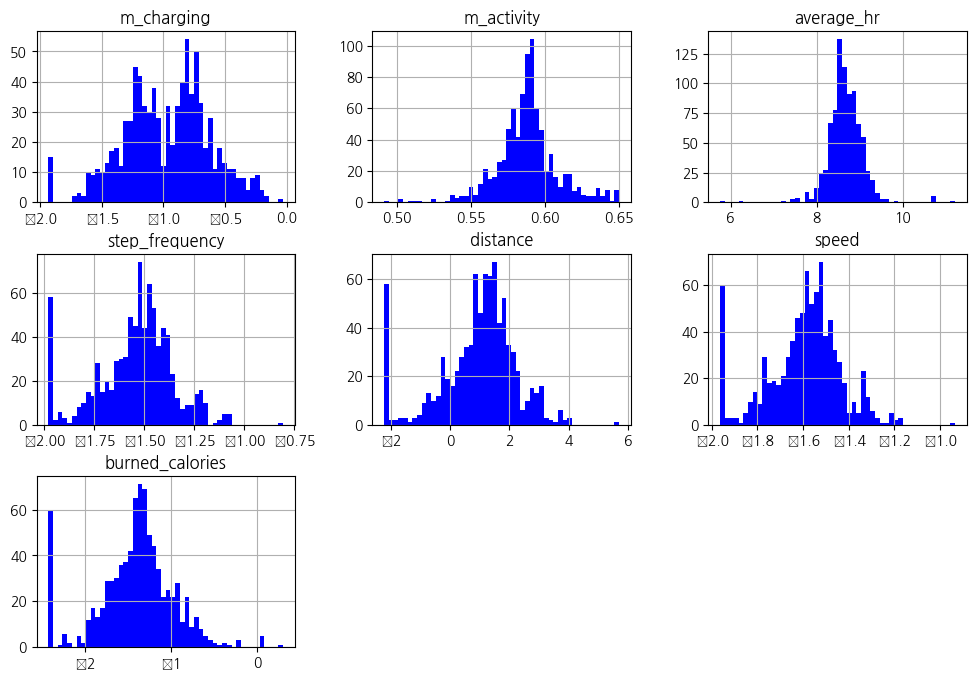

In [15]:
from scipy.stats import boxcox
box_cols = ["m_charging", "m_activity", "average_hr", "step_frequency", "distance", "speed", "burned_calories"]
for box in box_cols:
    merged_df[box] = merged_df[box] + 1e-5
    merged_df[box], l = boxcox(merged_df[box])

merged_df[box_cols].hist(figsize = (12,8), color = "b", bins = 50);

In [16]:
"""
def preprocess(df, col):
    df = df.copy()
 

    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df = df.set_index("timestamp")
    df = df.sort_index()

    rolling_result_1h = df.groupby("subject_id")[col].rolling(window= "1H").mean()
    rolling_result_1d = df.groupby("subject_id")[col].rolling(window = "1D").mean()

    rolling_result_1h.name = f"{col}_r-m_1H"
    rolling_result_1d.name = f"{col}_r-m_1D"
        
    rolling_result_1h = rolling_result_1h.reset_index()
    rolling_result_1d = rolling_result_1d.reset_index()


    df = df.reset_index()
    df = df.merge(rolling_result_1h, on = ["subject_id", "timestamp"], how = "left")
    df = df.merge(rolling_result_1d, on = ["subject_id", "timestamp"], how = "left")

    return df


Status = preprocess(Status_df, "m_charging")
Activity = preprocess(Activity_df, "m_activity")
wHr = preprocess(wHr_df, "average_hr")
"""


'\ndef preprocess(df, col):\n    df = df.copy()\n \n\n    df["timestamp"] = pd.to_datetime(df["timestamp"])\n    df = df.set_index("timestamp")\n    df = df.sort_index()\n\n    rolling_result_1h = df.groupby("subject_id")[col].rolling(window= "1H").mean()\n    rolling_result_1d = df.groupby("subject_id")[col].rolling(window = "1D").mean()\n\n    rolling_result_1h.name = f"{col}_r-m_1H"\n    rolling_result_1d.name = f"{col}_r-m_1D"\n        \n    rolling_result_1h = rolling_result_1h.reset_index()\n    rolling_result_1d = rolling_result_1d.reset_index()\n\n\n    df = df.reset_index()\n    df = df.merge(rolling_result_1h, on = ["subject_id", "timestamp"], how = "left")\n    df = df.merge(rolling_result_1d, on = ["subject_id", "timestamp"], how = "left")\n\n    return df\n\n\nStatus = preprocess(Status_df, "m_charging")\nActivity = preprocess(Activity_df, "m_activity")\nwHr = preprocess(wHr_df, "average_hr")\n'

C:\Users\yunju\AppData\Local\Temp\ipykernel_33452\3584424587.py:22: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.tight_layout()
C:\Users\yunju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


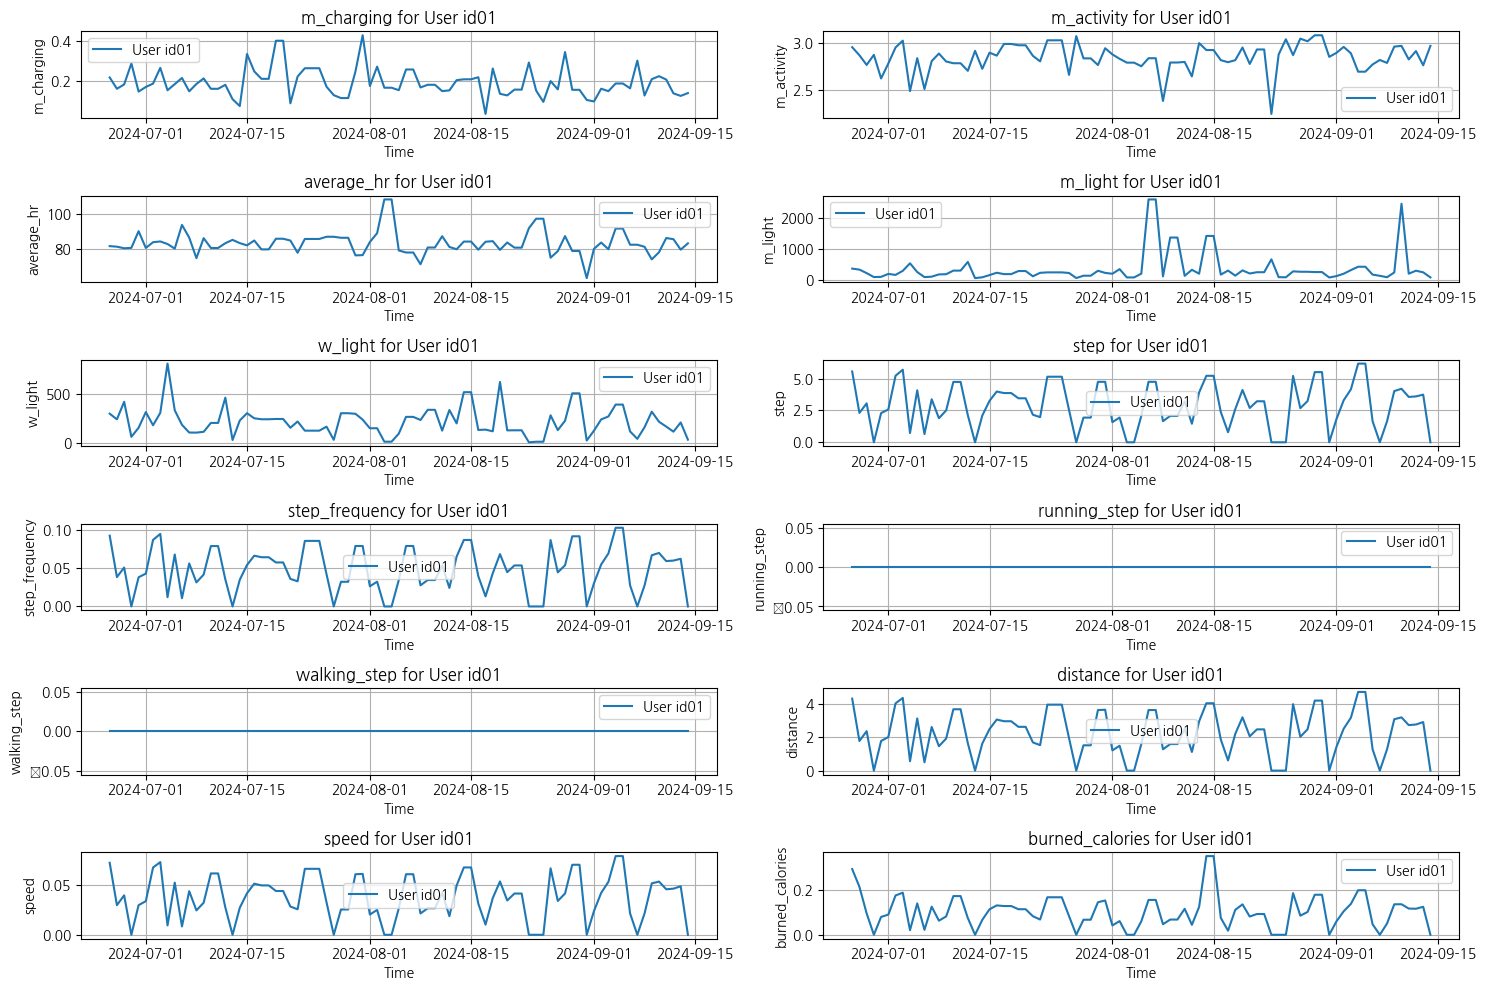

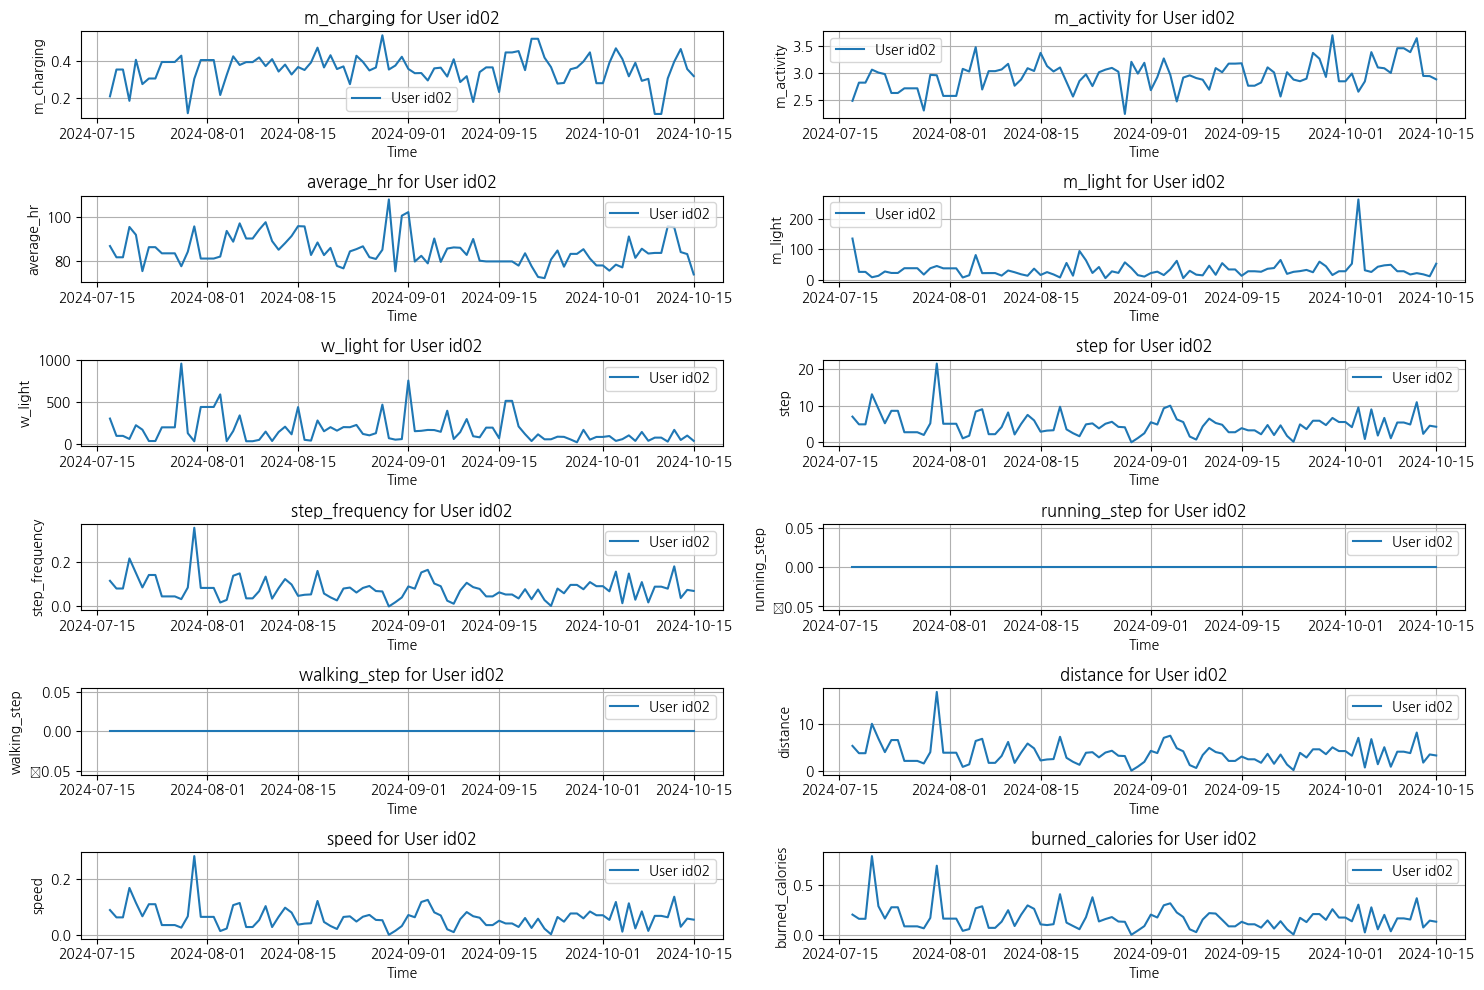

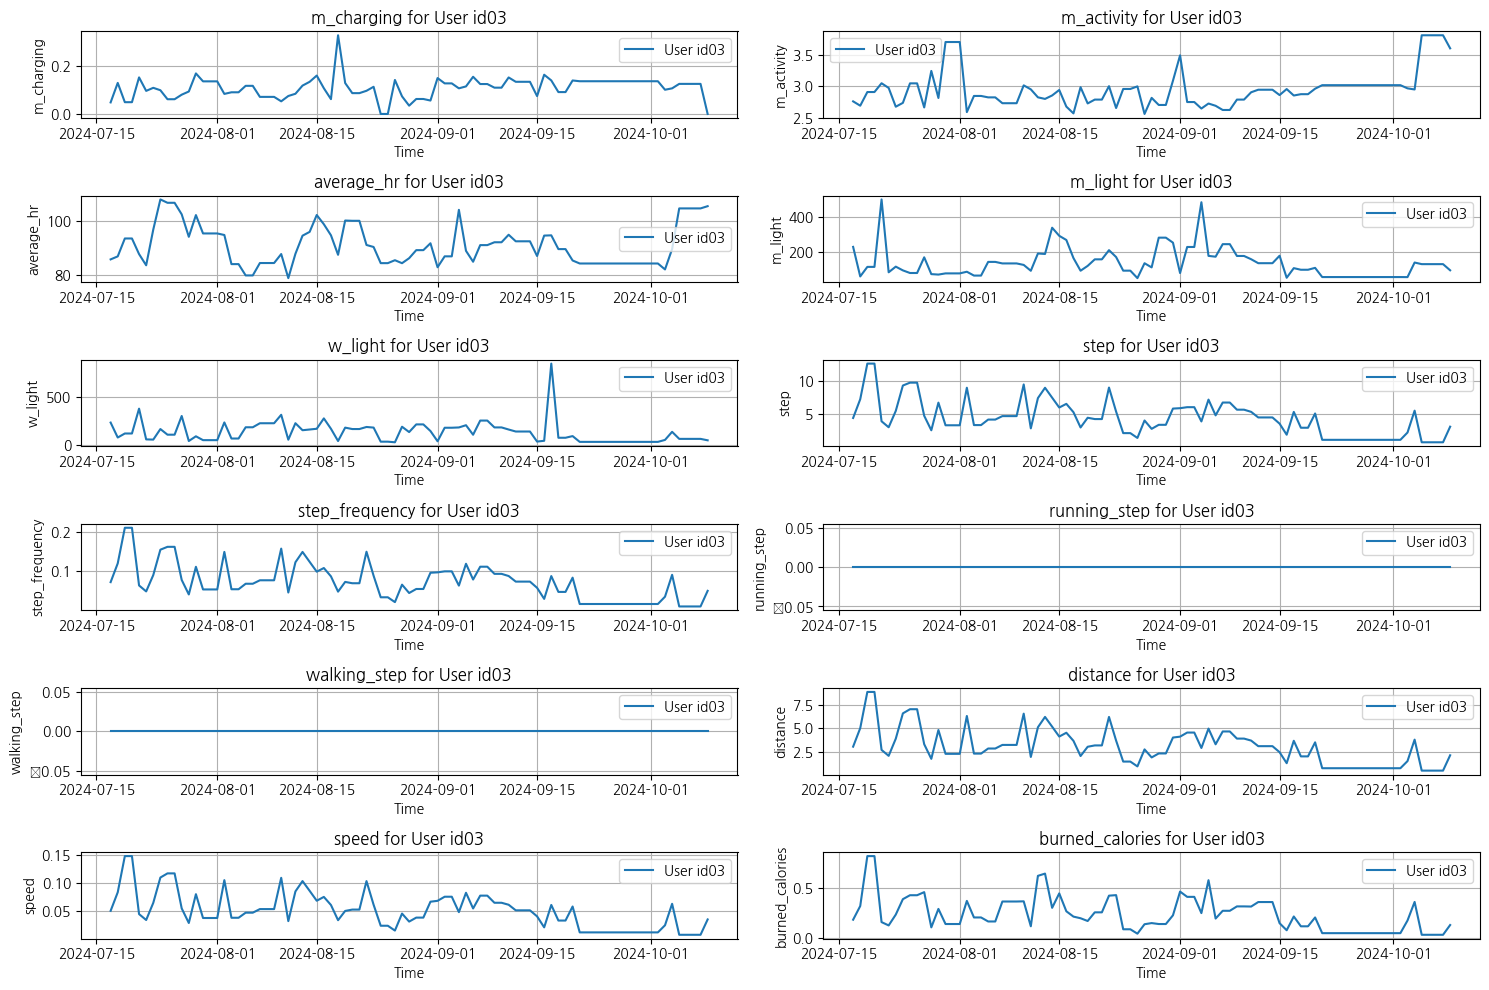

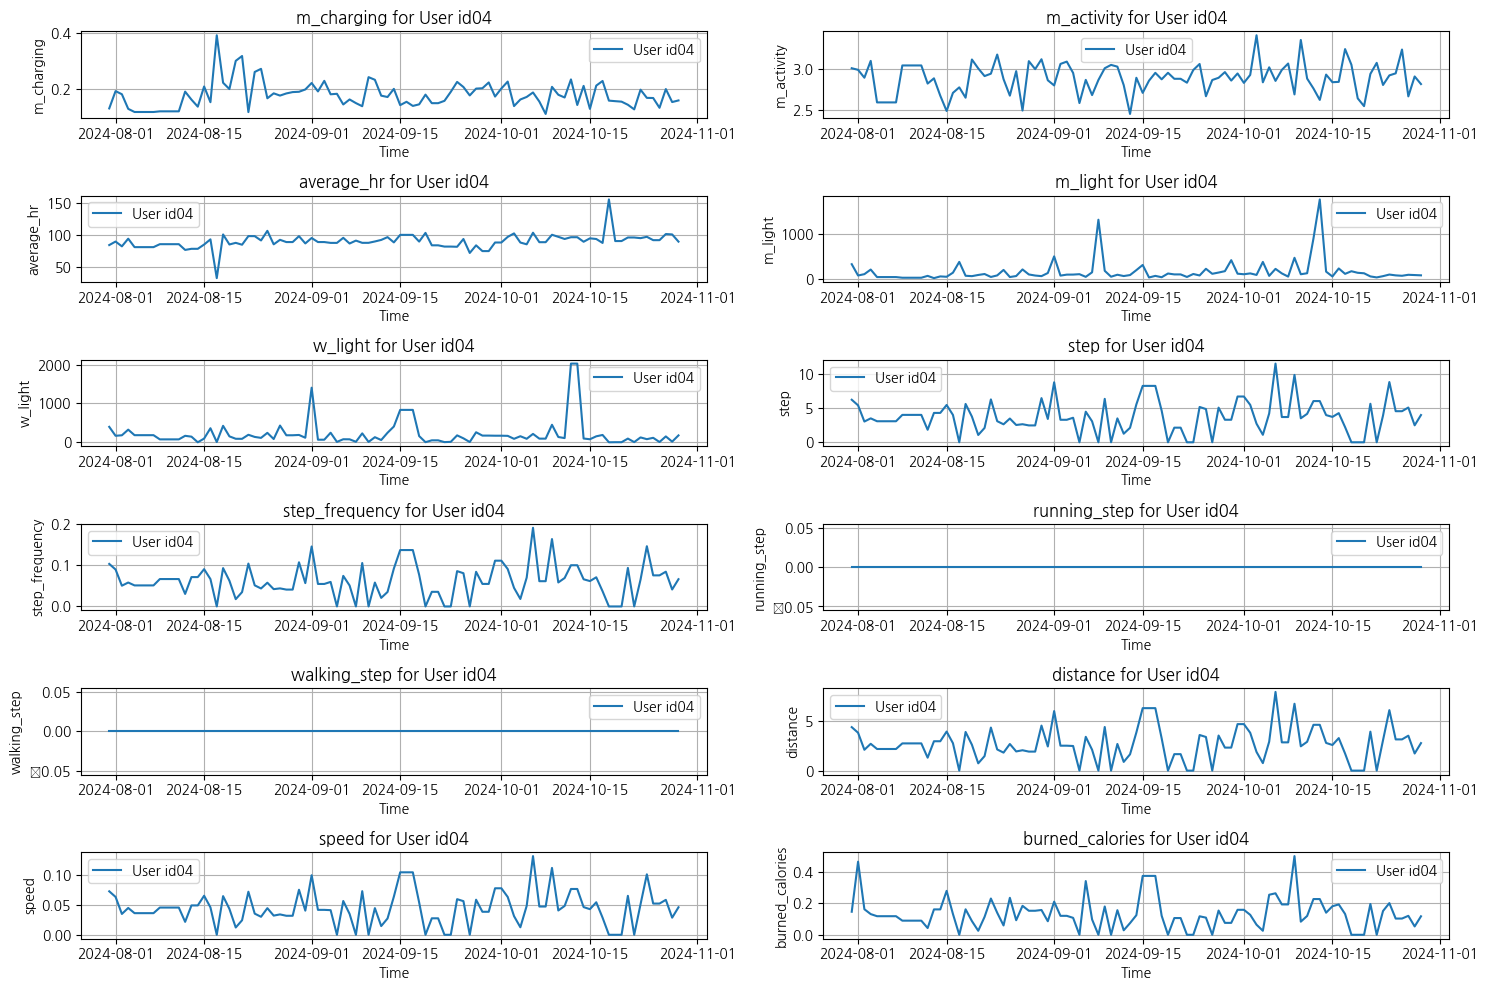

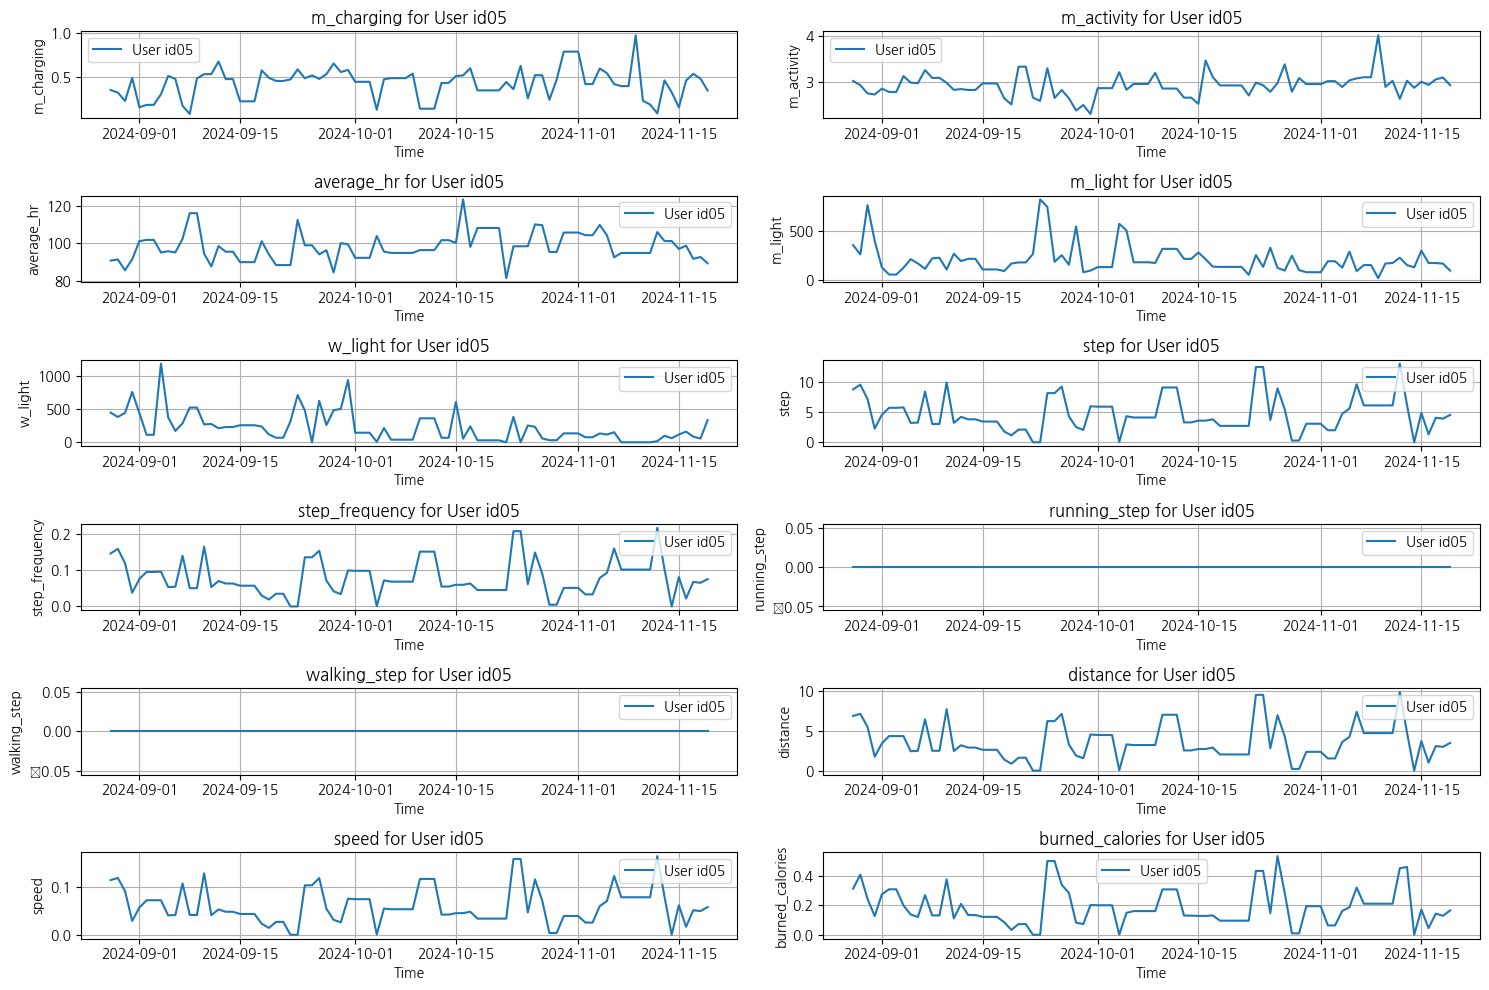

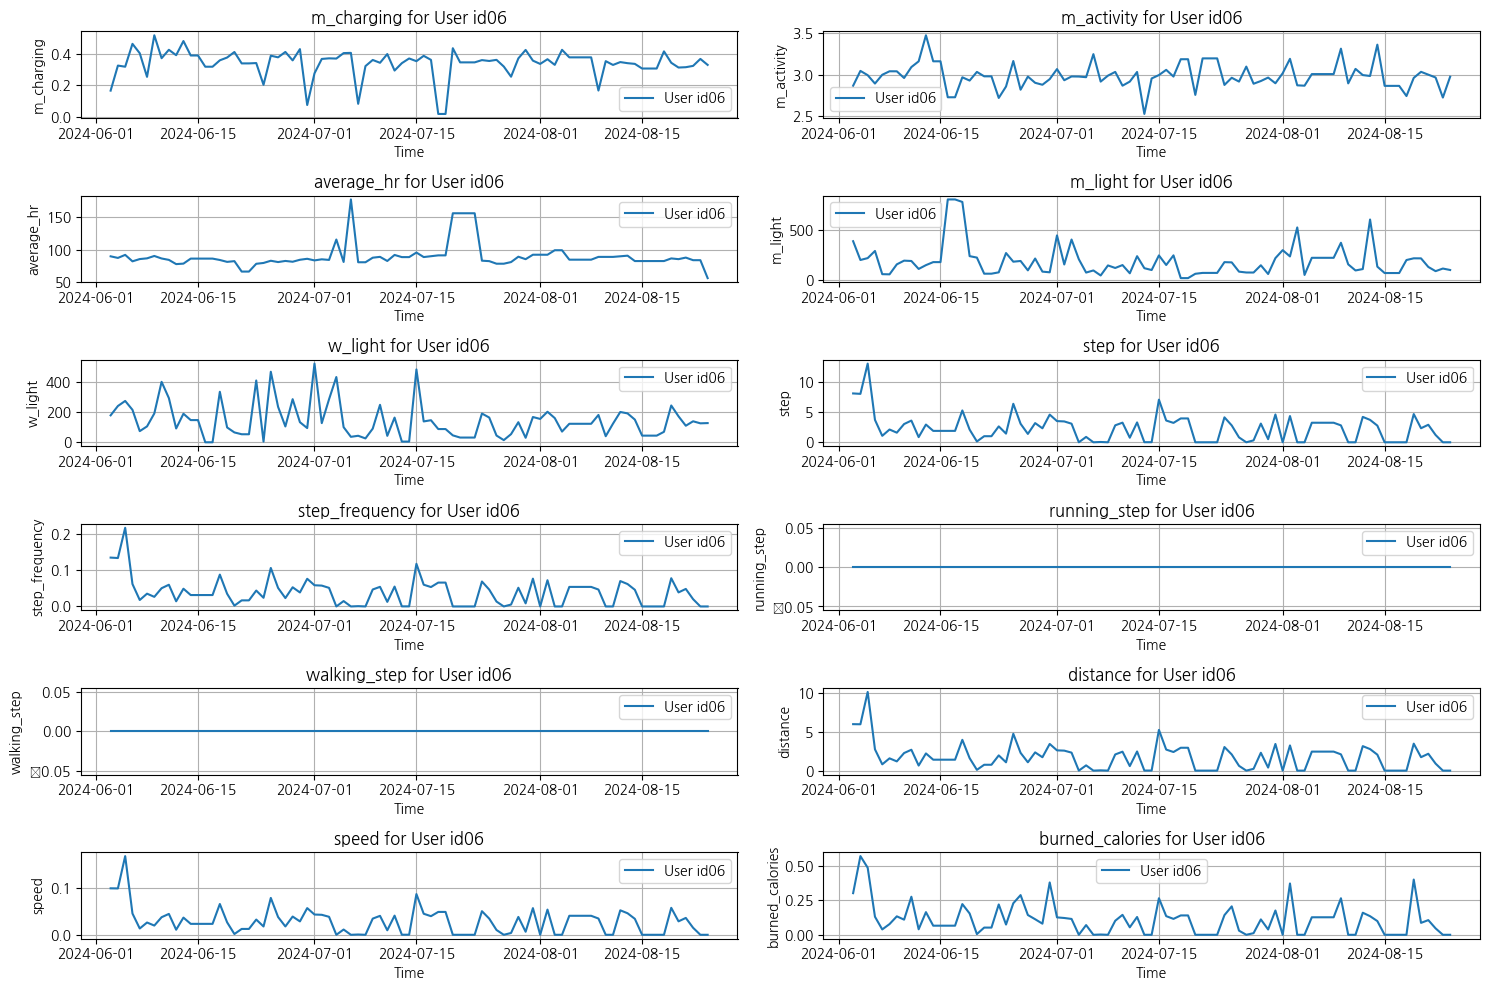

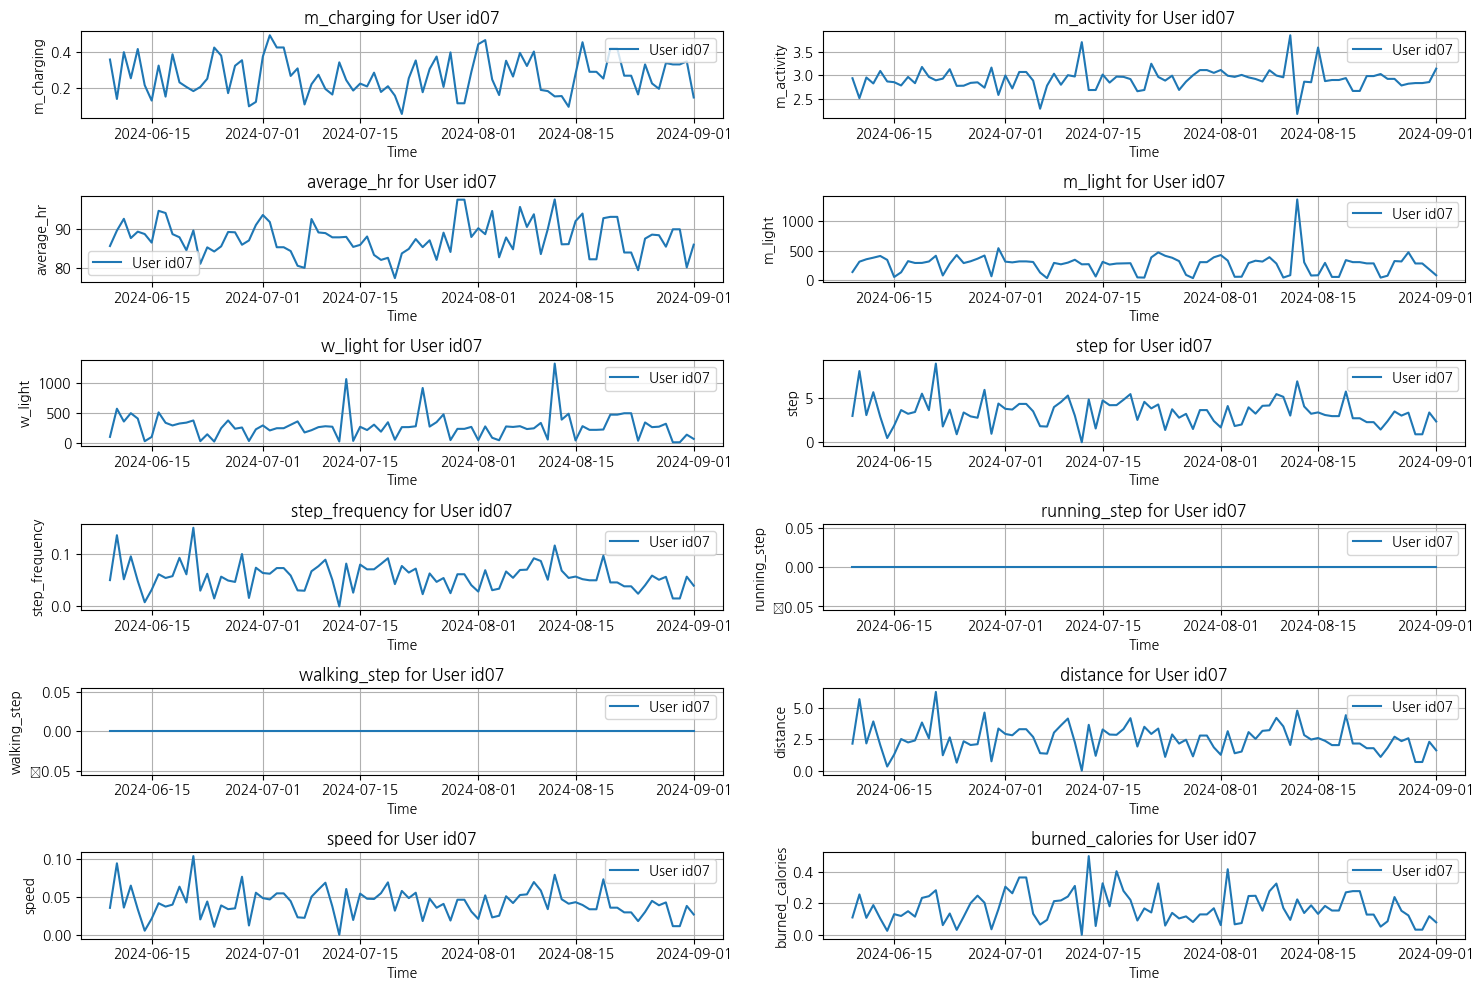

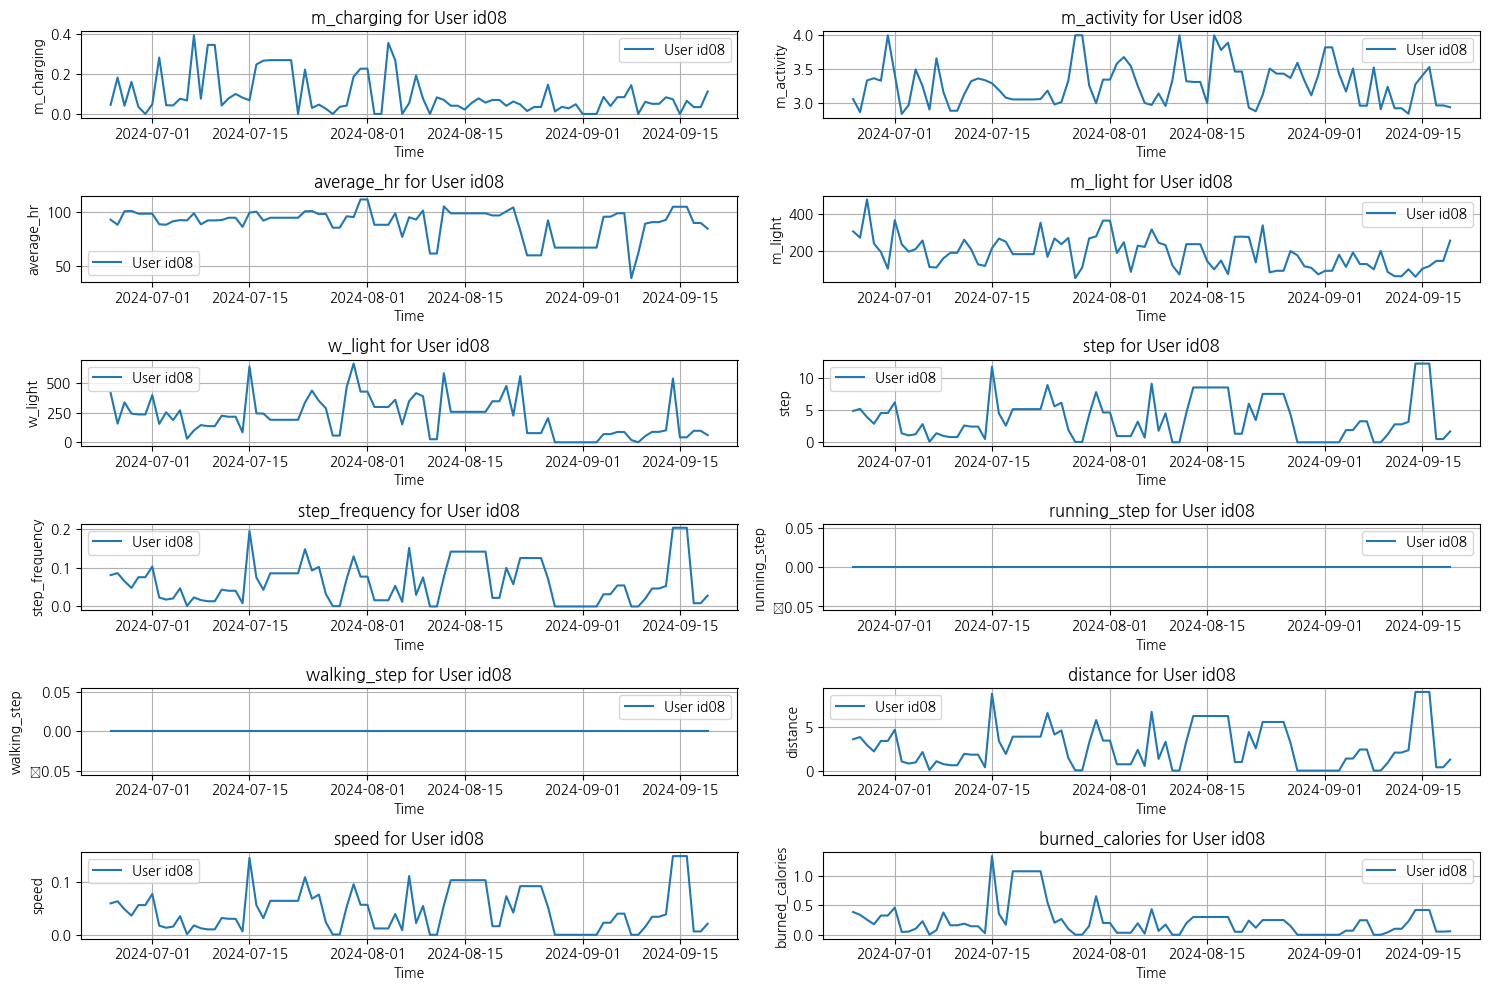

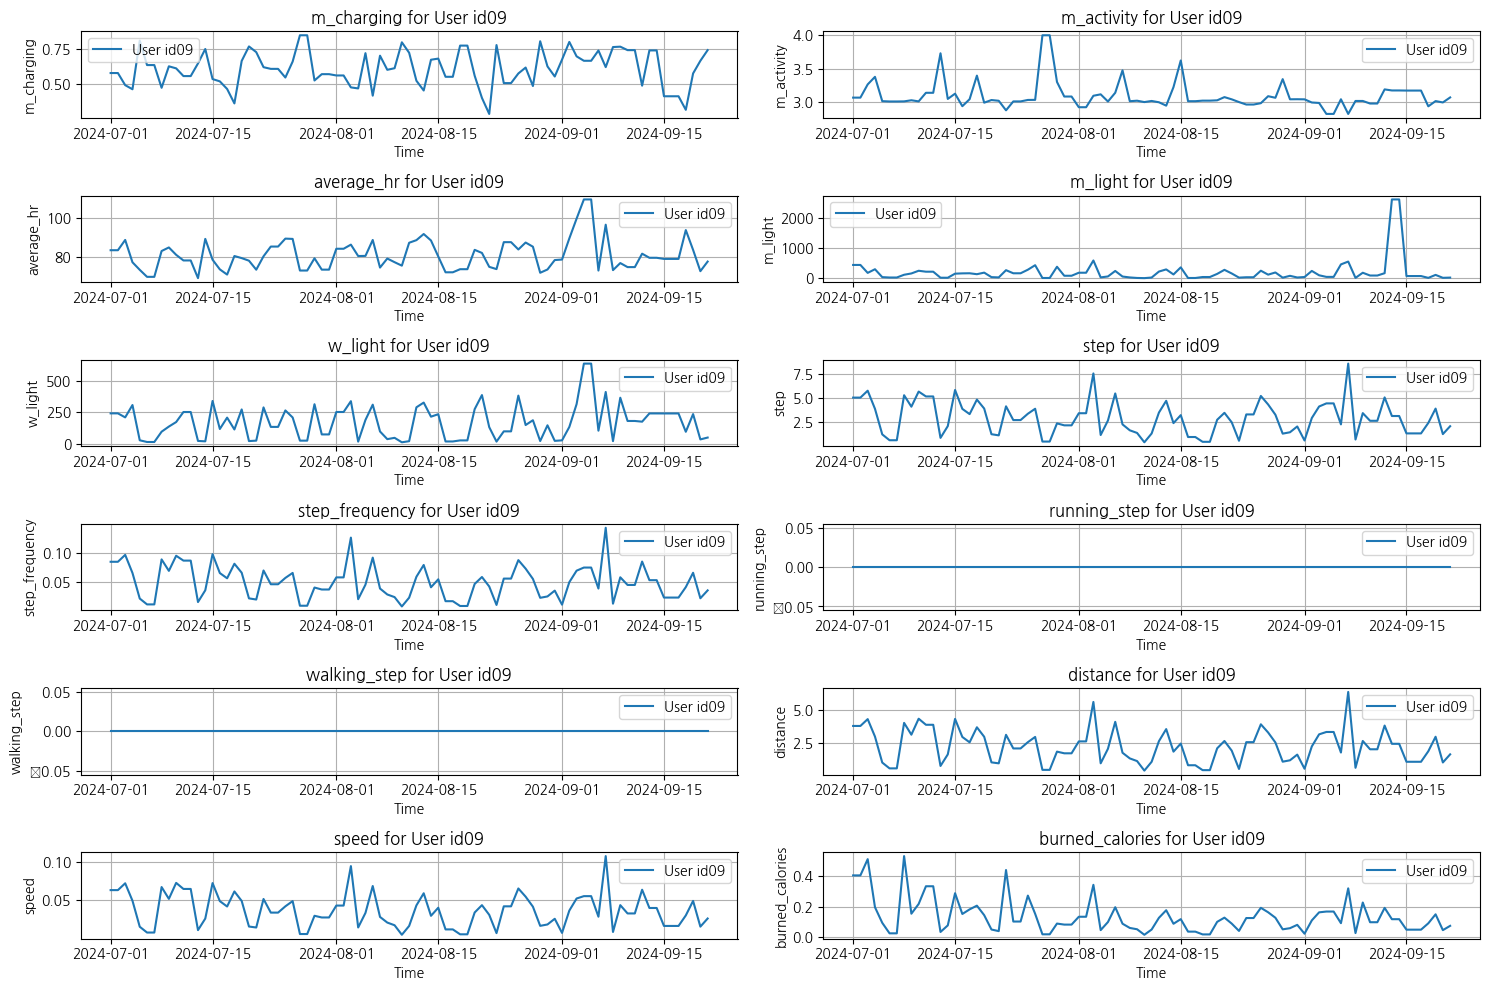

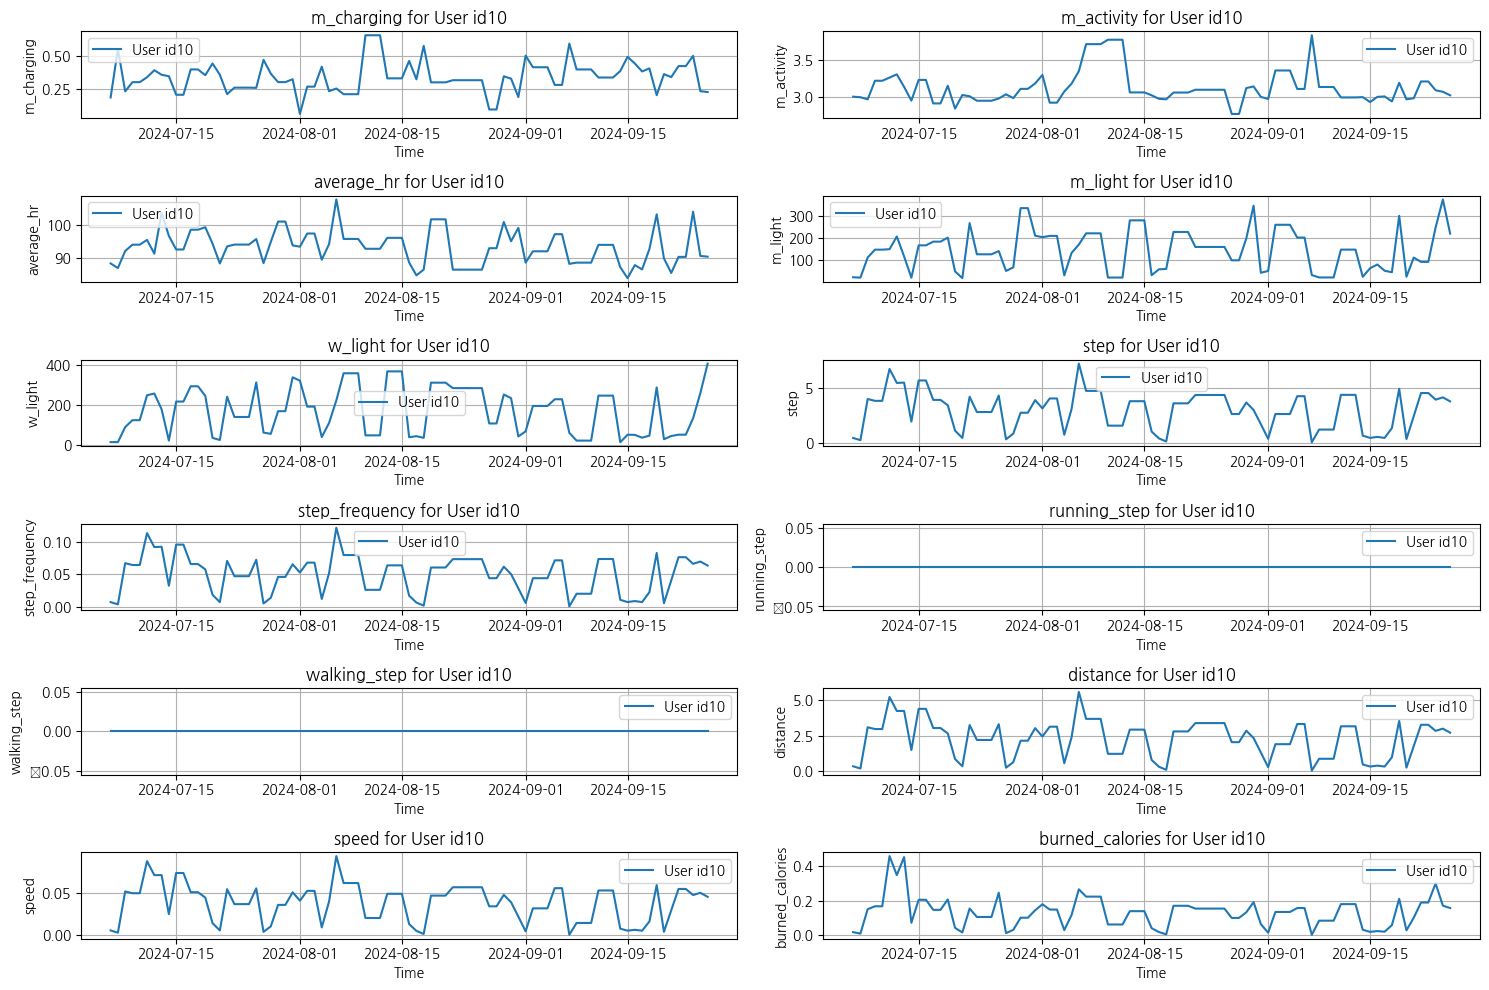

In [17]:
cols = ['m_charging', 'm_activity', 'average_hr', 'm_light', 'w_light', 'step',
       'step_frequency', 'running_step', 'walking_step', 'distance', 'speed',
       'burned_calories']

n_cols = 2 
n_rows = (len(cols) + 1) // n_cols


for subject_id, group in merged_df_index.groupby("subject_id"):
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        ax = axes[i]
        ax.plot(group["timestamp"], group[col], label=f"User {subject_id}")
        ax.set_xlabel("Time")
        ax.set_ylabel(f"{col}")
        ax.set_title(f"{col} for User {subject_id}")
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

In [18]:
for sid, group in Activity.groupby("subject_id"):
    plt.figure(figsize = (12,8))
    plt.plot(group["timestamp"], group["m_activity_rolling_mean_1D"], label=f"User {sid}")
    plt.plot(group["timestamp"], group["m_activity_rolling_mean_1H"], alpha = 0.3, label = "Raw")
    plt.xlabel("Time")
    plt.ylabel("Activity Mean")
    plt.title("Hourly Activity Trend")
    plt.legend()
    plt.show()

NameError: name 'Activity' is not defined